In [2]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from pandas.plotting import parallel_coordinates
import numpy as np
streamer_data = pd.read_csv("twitchdata-update.csv")

In [4]:
streamer_data.head()

,Channel,Watch time(Minutes),Stream time(minutes),Peak viewers,Average viewers,Followers,Followers gained,Views gained,Partnered,Mature,Language
0,xQcOW,6196161750,215250,222720,27716,3246298,1734810,93036735,True,False,English
1,summit1g,6091677300,211845,310998,25610,5310163,1370184,89705964,True,False,English
2,Gaules,5644590915,515280,387315,10976,1767635,1023779,102611607,True,True,Portuguese
3,ESL_CSGO,3970318140,517740,300575,7714,3944850,703986,106546942,True,False,English
4,Tfue,3671000070,123660,285644,29602,8938903,2068424,78998587,True,False,English



To cluster streamers using K-means, here’s the plan:

Select Features: Choose columns for clustering (e.g., Watch time, Stream time, Peak viewers, etc.).
Preprocess Data: Normalize the data to ensure features contribute equally to clustering.
Determine Optimal Clusters:
Use the elbow method to find the ideal number of clusters.
Apply K-Means:
Perform clustering using the optimal number of clusters.
Visualize Results:
Use scatter plots or pair plots to visualize clusters.
Label streamers by cluster for interpretation.
Let’s start by selecting the features and finding the optimal number of clusters. Could you confirm if the following features are suitable for clustering:

Watch time(Minutes)
Stream time(minutes)
Peak viewers
Average viewers
Followers
Followers gained
Views gained

Steps:
Prepare Data: Use the features you’ve listed.
Normalize Features: Normalize the data so all features have the same scale.
Determine Optimal Clusters: Use the Elbow Method.
Apply K-Means: Perform clustering using the optimal number of clusters.
Visualize and Interpret Results: Analyze the clusters.


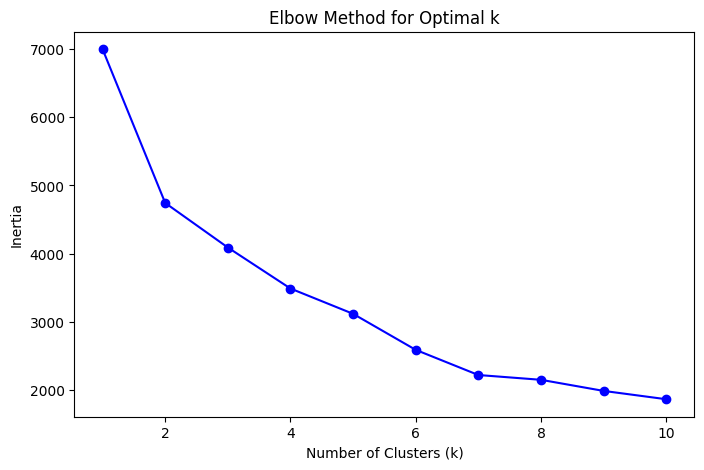

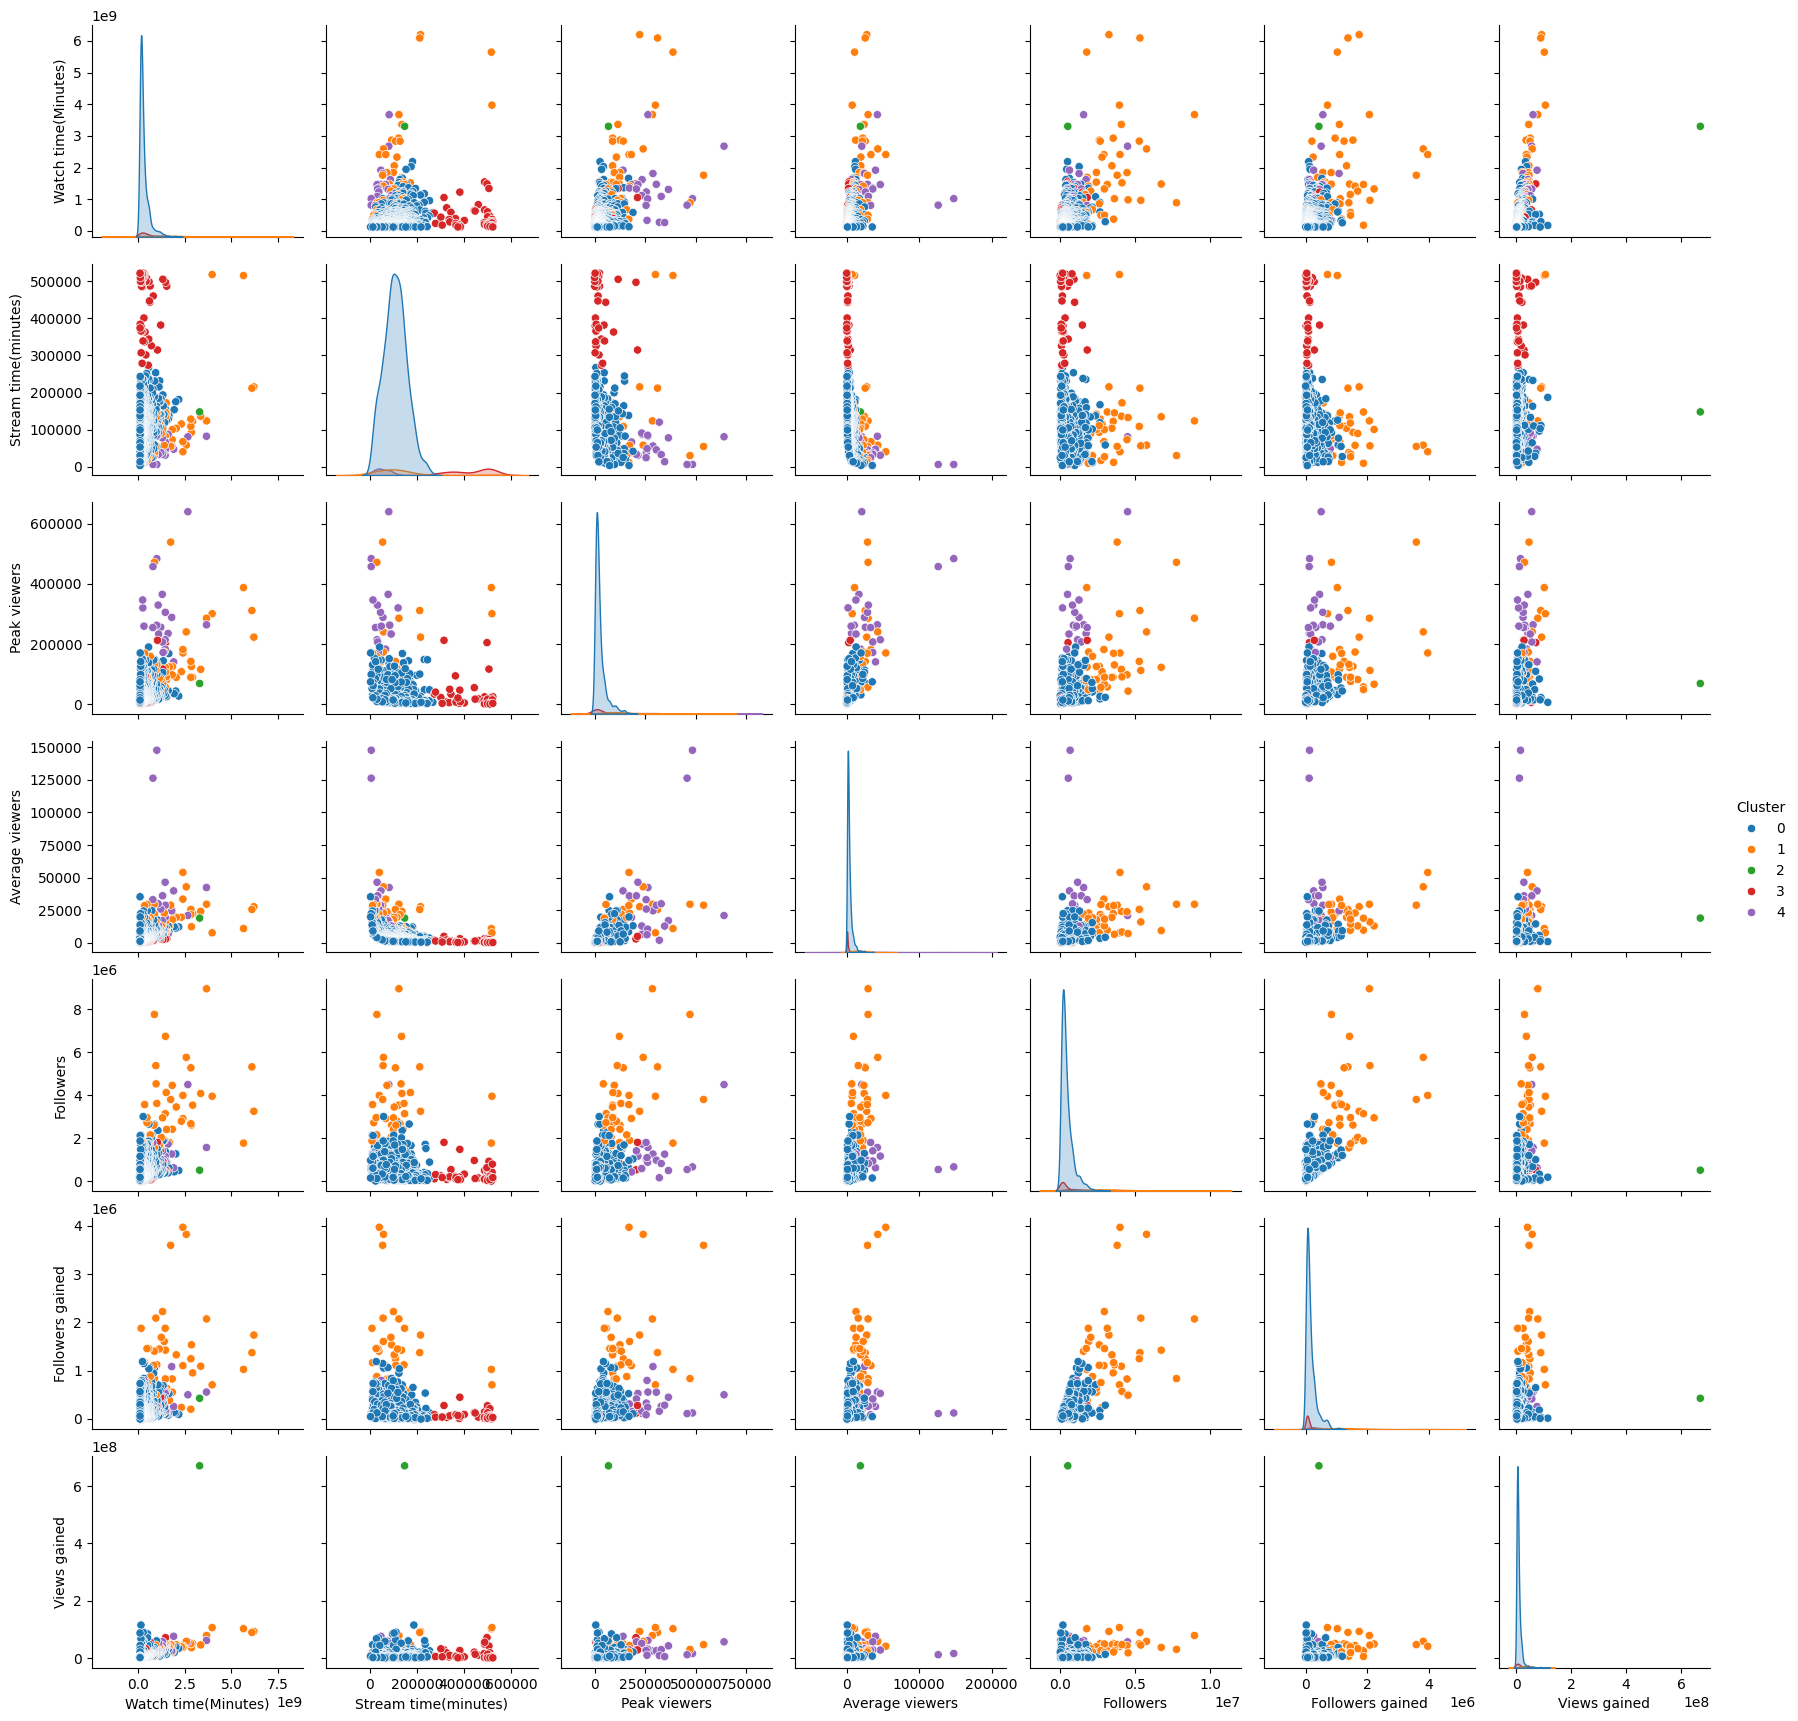

    Channel  Cluster  Watch time(Minutes)  Stream time(minutes)  Peak viewers  \
0     xQcOW        1           6196161750                215250        222720   
1  summit1g        1           6091677300                211845        310998   
2    Gaules        1           5644590915                515280        387315   
3  ESL_CSGO        1           3970318140                517740        300575   
4      Tfue        1           3671000070                123660        285644   

   Average viewers  Followers  Followers gained  Views gained  
0            27716    3246298           1734810      93036735  
1            25610    5310163           1370184      89705964  
2            10976    1767635           1023779     102611607  
3             7714    3944850            703986     106546942  
4            29602    8938903           2068424      78998587  


In [34]:
import pandas as pd
import numpy as np
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
import seaborn as sns

# Load data (ensure you have streamer_data available)
df = streamer_data.copy()

# Select relevant features for clustering
features = ['Watch time(Minutes)', 'Stream time(minutes)', 'Peak viewers',
            'Average viewers', 'Followers', 'Followers gained', 'Views gained']

X = df[features]

# Normalize data
scaler = StandardScaler()
X_normalized = scaler.fit_transform(X)

# Determine optimal clusters using Elbow Method
inertia = []
K_range = range(1, 11)
for k in K_range:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(X_normalized)
    inertia.append(kmeans.inertia_)

# Plot Elbow Curve
plt.figure(figsize=(8, 5))
plt.plot(K_range, inertia, 'bo-')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Inertia')
plt.title('Elbow Method for Optimal k')
plt.show()

# Choose optimal k (e.g., from elbow method) and apply K-Means
optimal_k = int(input("Enter the optimal number of clusters from the plot: "))  # Example: 3
kmeans = KMeans(n_clusters=optimal_k, random_state=42)
clusters = kmeans.fit_predict(X_normalized)

# Add cluster labels to the DataFrame
df['Cluster'] = clusters

# Visualize clusters (pairplot for key features)
sns.pairplot(df, vars=features, hue='Cluster', palette='tab10')
plt.show()

# Display first few rows with cluster labels
print(df[['Channel', 'Cluster'] + features].head())


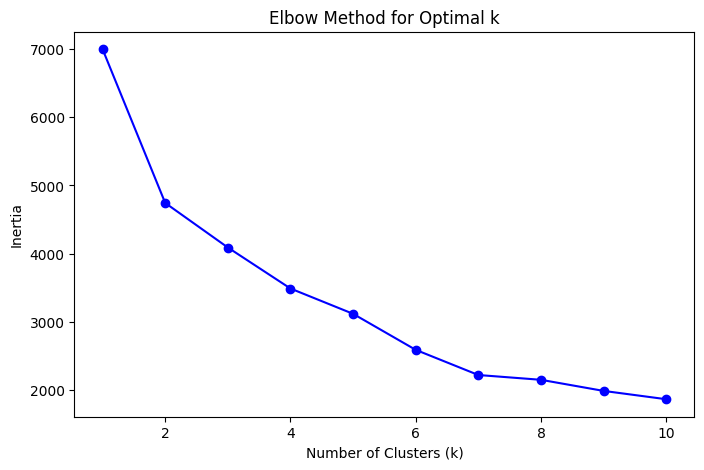

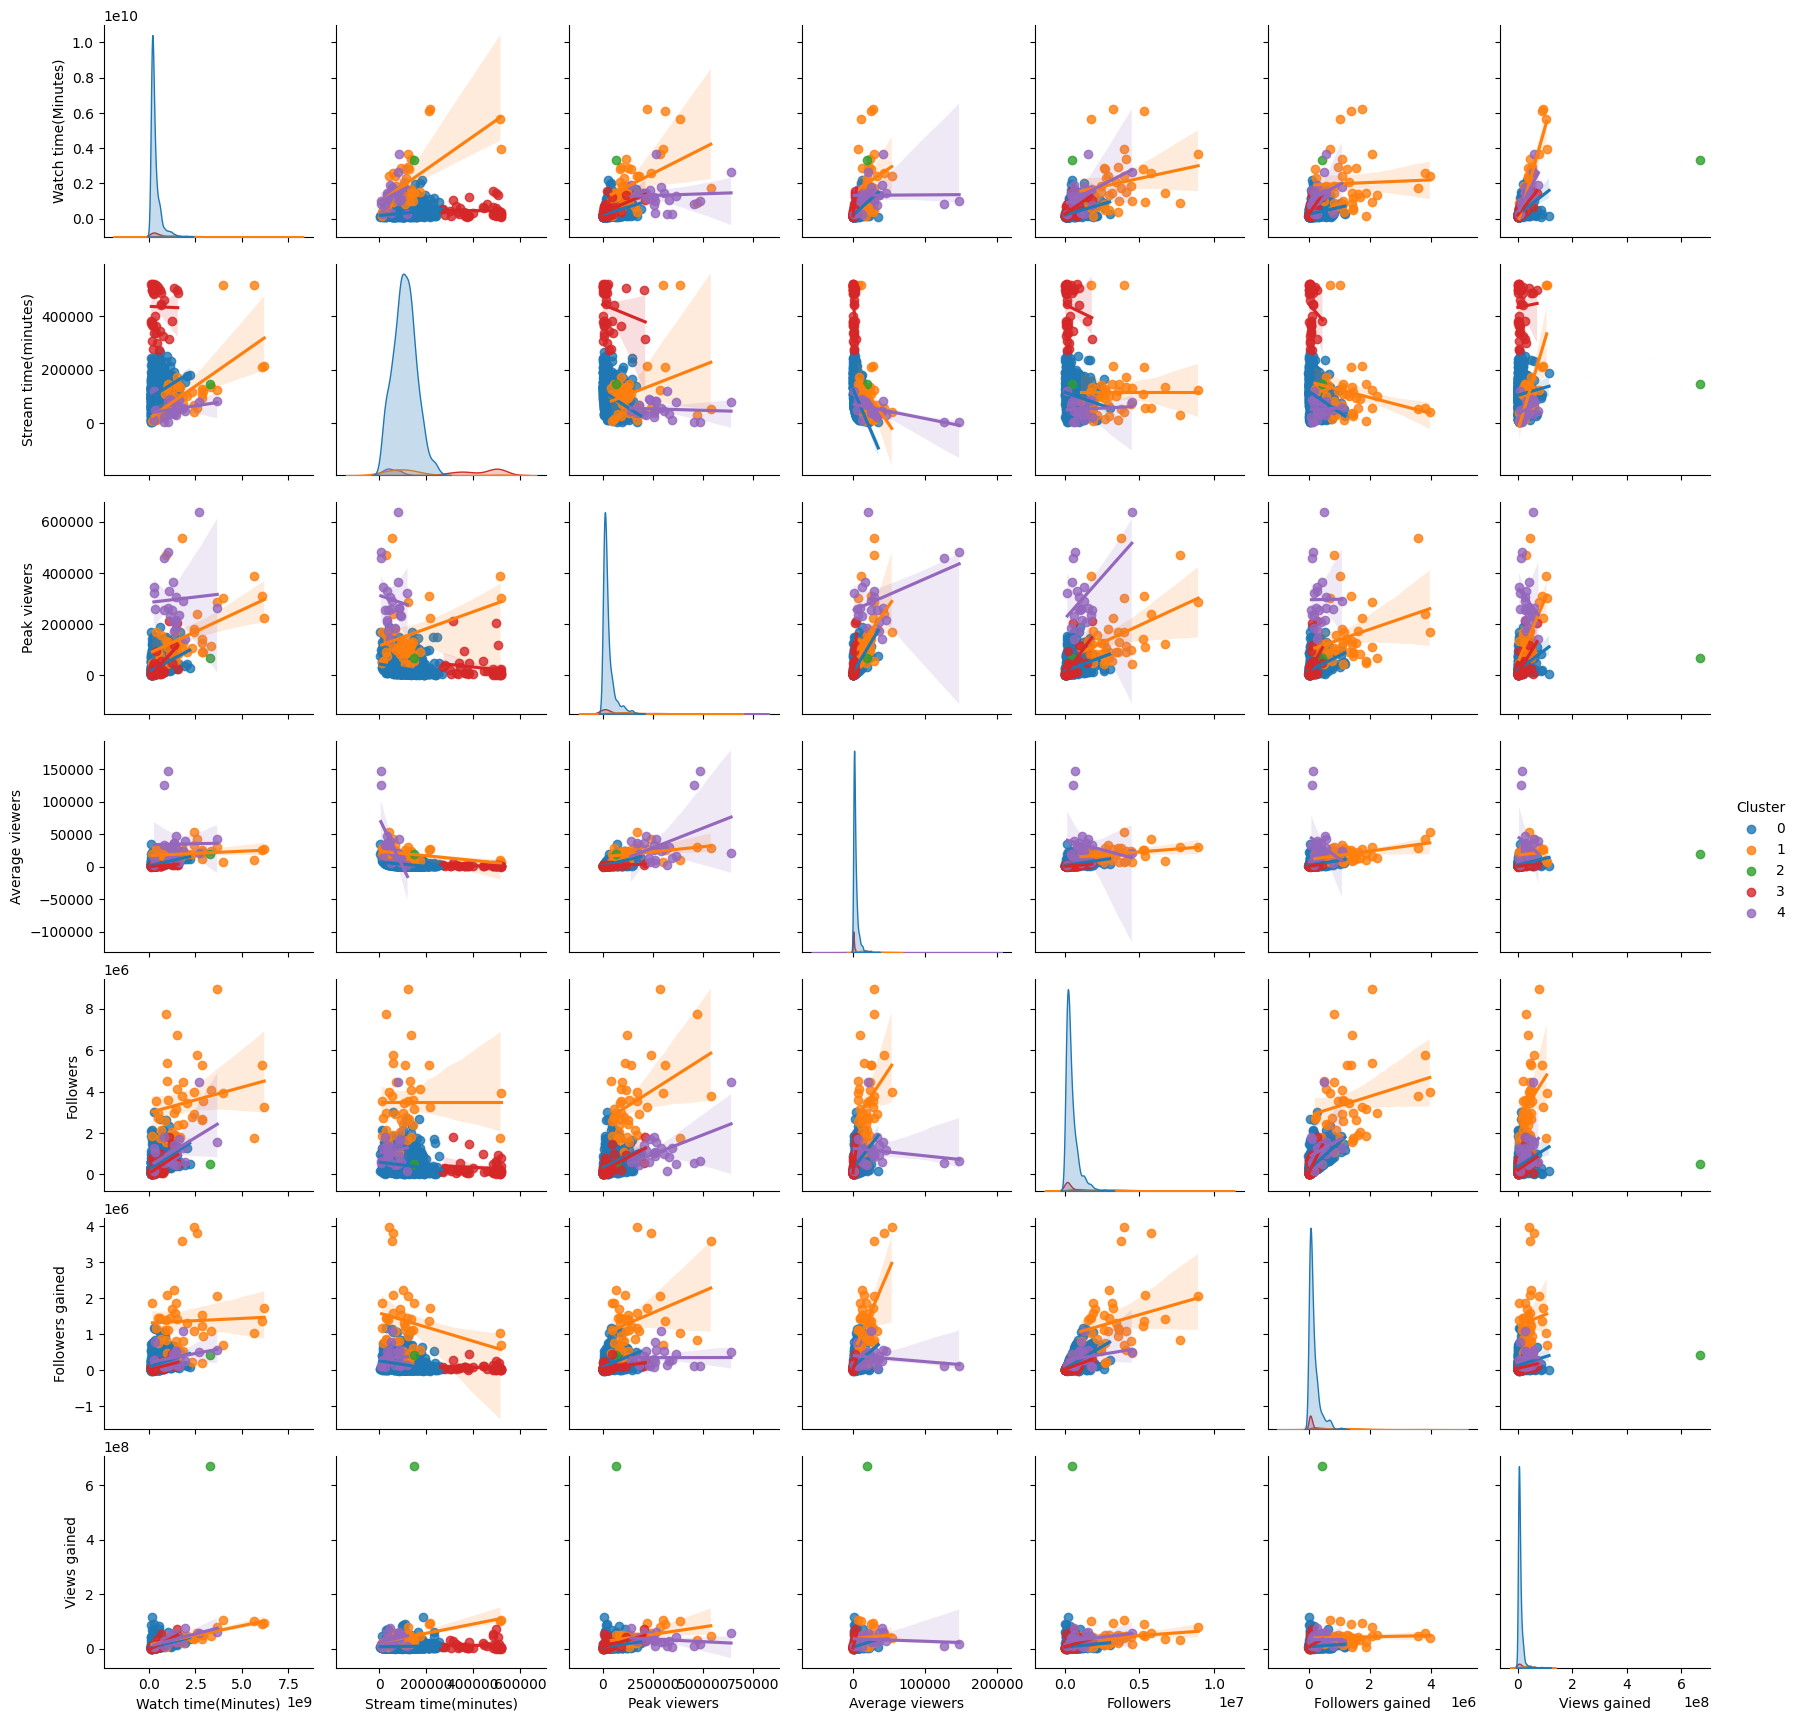

    Channel  Cluster  Watch time(Minutes)  Stream time(minutes)  Peak viewers  \
0     xQcOW        1           6196161750                215250        222720   
1  summit1g        1           6091677300                211845        310998   
2    Gaules        1           5644590915                515280        387315   
3  ESL_CSGO        1           3970318140                517740        300575   
4      Tfue        1           3671000070                123660        285644   

   Average viewers  Followers  Followers gained  Views gained  
0            27716    3246298           1734810      93036735  
1            25610    5310163           1370184      89705964  
2            10976    1767635           1023779     102611607  
3             7714    3944850            703986     106546942  
4            29602    8938903           2068424      78998587  


In [33]:
import pandas as pd
import numpy as np
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
import seaborn as sns

# Load data (ensure you have streamer_data available)
df = streamer_data.copy()

# Select relevant features for clustering
features = ['Watch time(Minutes)', 'Stream time(minutes)', 'Peak viewers',
            'Average viewers', 'Followers', 'Followers gained', 'Views gained']

X = df[features]

# Normalize data
scaler = StandardScaler()
X_normalized = scaler.fit_transform(X)

# Determine optimal clusters using Elbow Method
inertia = []
K_range = range(1, 11)
for k in K_range:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(X_normalized)
    inertia.append(kmeans.inertia_)

# Plot Elbow Curve
plt.figure(figsize=(8, 5))
plt.plot(K_range, inertia, 'bo-')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Inertia')
plt.title('Elbow Method for Optimal k')
plt.show()

# Choose optimal k (e.g., from elbow method) and apply K-Means
optimal_k = int(input("Enter the optimal number of clusters from the plot: "))  # Example: 3
kmeans = KMeans(n_clusters=optimal_k, random_state=42)
clusters = kmeans.fit_predict(X_normalized)

# Add cluster labels to the DataFrame
df['Cluster'] = clusters

# Visualize clusters with pairplot including trendlines
sns.pairplot(df, vars=features, hue='Cluster', palette='tab10', kind='reg')
plt.show()

# Display first few rows with cluster labels
print(df[['Channel', 'Cluster'] + features].head())


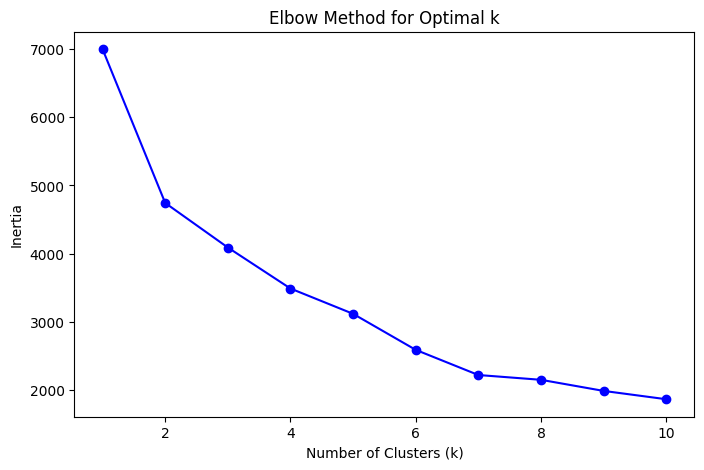

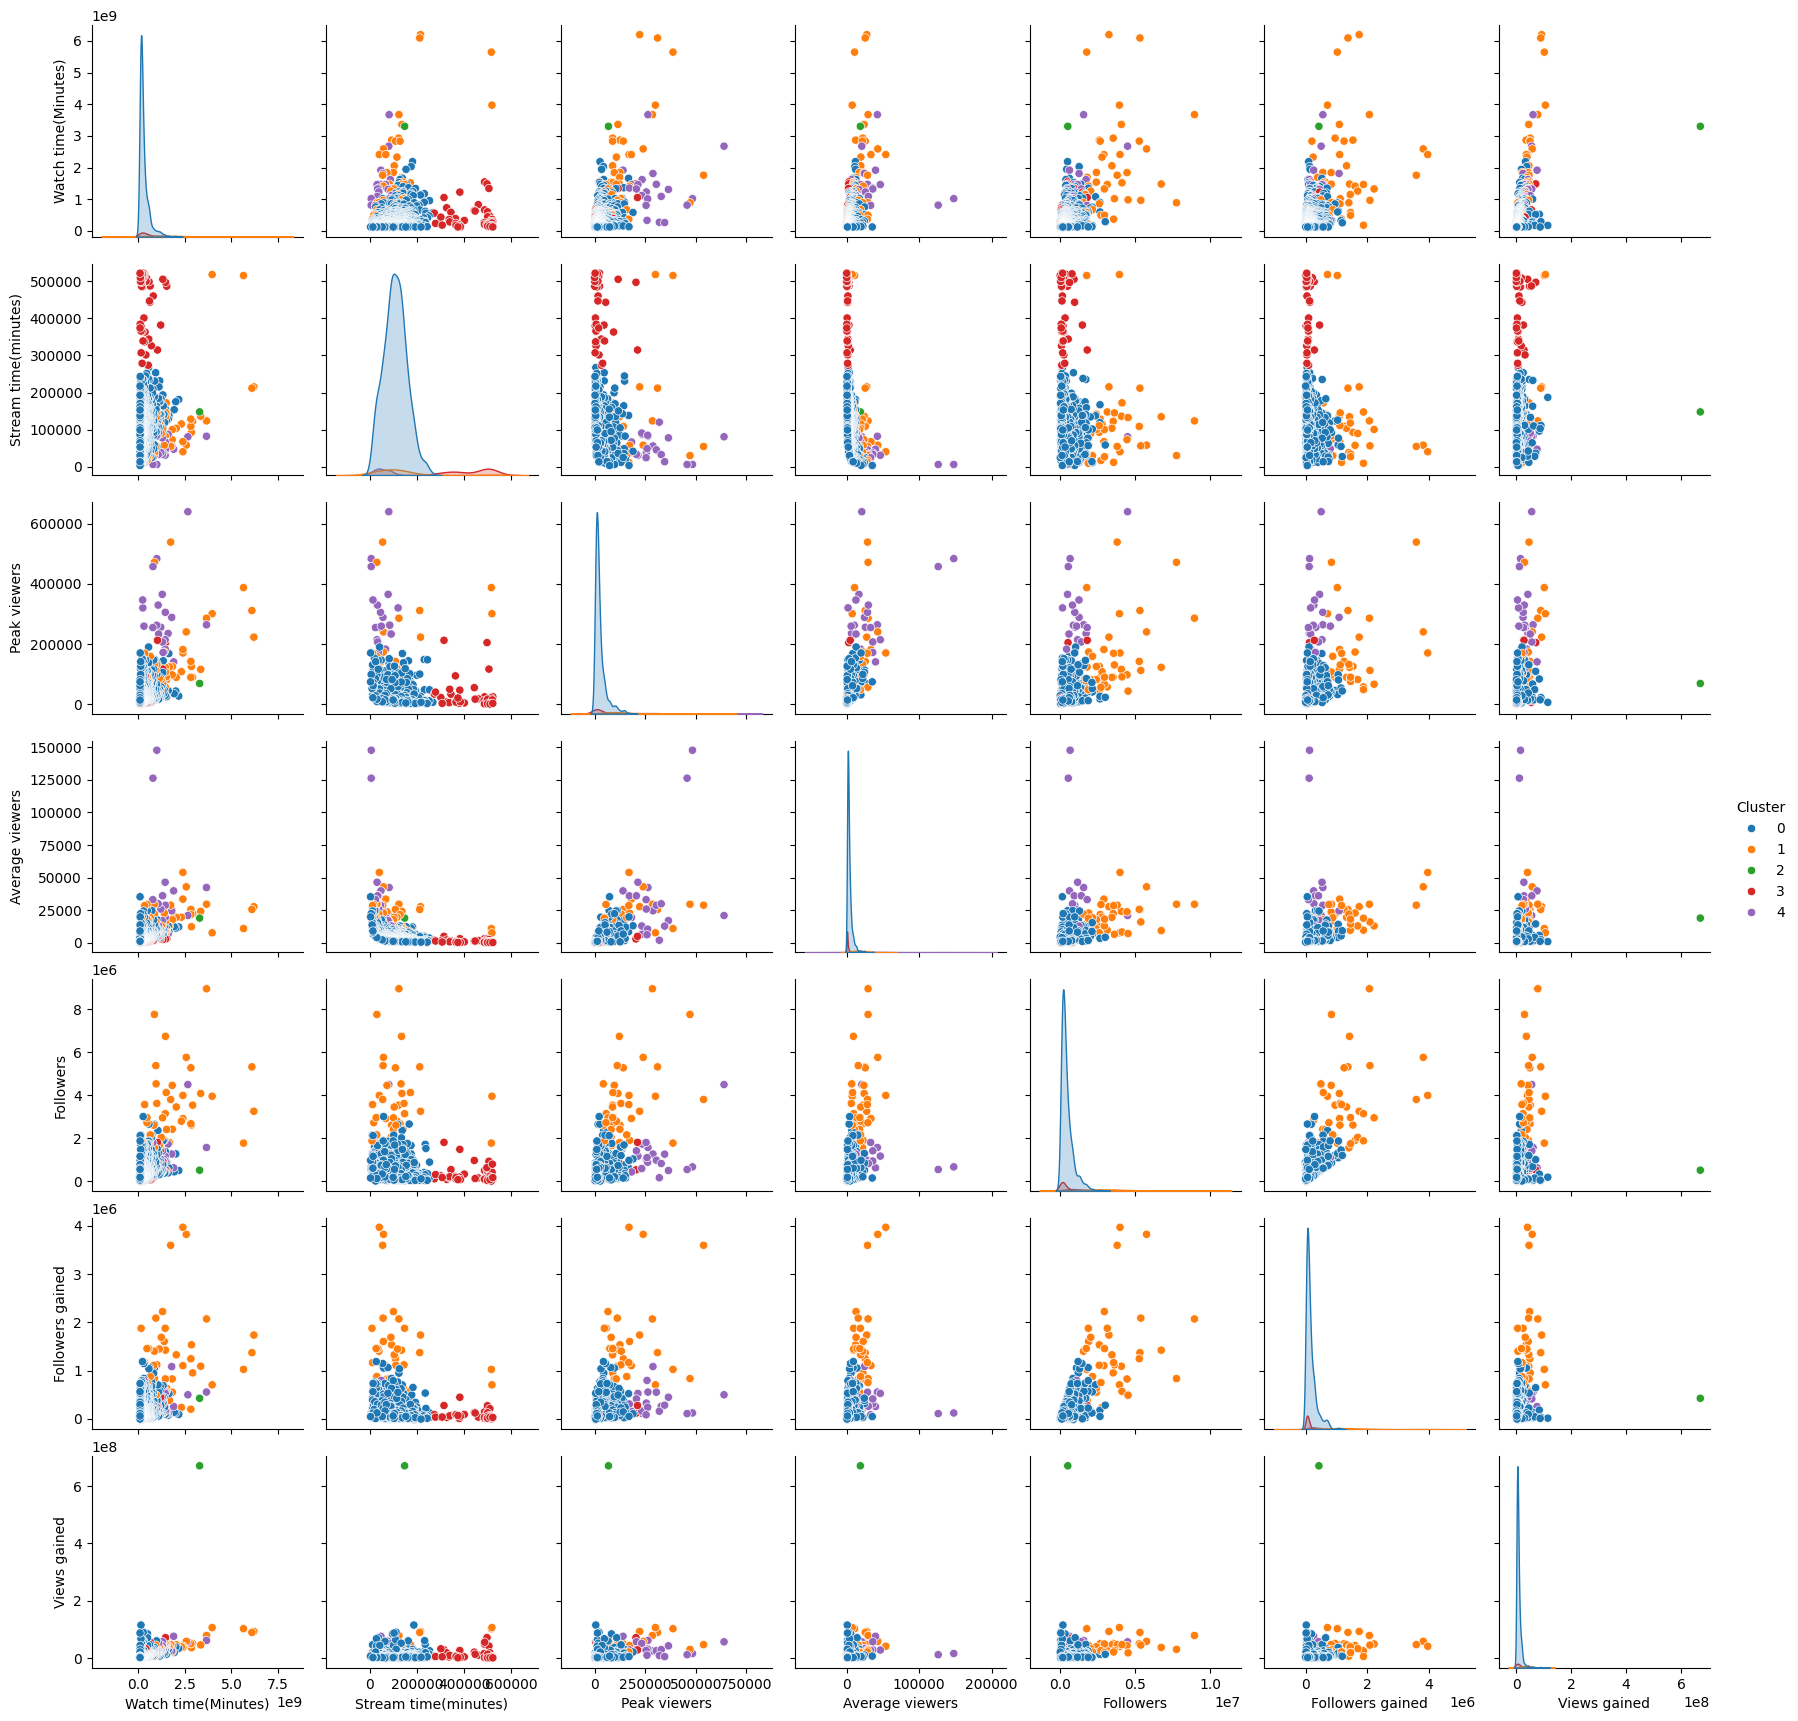

        Watch time(Minutes)                                          \
                       mean        median           std         min   
Cluster                                                               
0              3.210192e+08  2.186423e+08  2.666830e+08   122192850   
1              2.007713e+09  1.528062e+09  1.473610e+09   179262330   
2              3.301867e+09  3.301867e+09           NaN  3301867485   
3              4.563995e+08  2.922871e+08  3.771770e+08   123273930   
4              1.334075e+09  1.308968e+09  7.780206e+08   262160025   

                    Stream time(minutes)                                   \
                max                 mean    median            std     min   
Cluster                                                                     
0        2186662470        107530.463170  107175.0   48717.433584    3465   
1        6196161750        115290.000000  102120.0  106382.312494    9555   
2        3301867485        147885.000000  1478

In [32]:
import pandas as pd
import numpy as np
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
import seaborn as sns

# Load data (ensure you have streamer_data available)
df = streamer_data.copy()

# Select relevant features for clustering
features = ['Watch time(Minutes)', 'Stream time(minutes)', 'Peak viewers',
            'Average viewers', 'Followers', 'Followers gained', 'Views gained']

X = df[features]

# Normalize data
scaler = StandardScaler()
X_normalized = scaler.fit_transform(X)

# Determine optimal clusters using Elbow Method
inertia = []
K_range = range(1, 11)
for k in K_range:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(X_normalized)
    inertia.append(kmeans.inertia_)

# Plot Elbow Curve
plt.figure(figsize=(8, 5))
plt.plot(K_range, inertia, 'bo-')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Inertia')
plt.title('Elbow Method for Optimal k')
plt.show()

# Choose optimal k (e.g., from elbow method) and apply K-Means
optimal_k = int(input("Enter the optimal number of clusters from the plot: "))  # Example: 3
kmeans = KMeans(n_clusters=optimal_k, random_state=42)
clusters = kmeans.fit_predict(X_normalized)

# Add cluster labels to the DataFrame
df['Cluster'] = clusters

# Visualize clusters with pairplot
sns.pairplot(df, vars=features, hue='Cluster', palette='tab10')
plt.show()

# Display cluster statistics (mean, median, std, min, max) for each cluster
cluster_stats = df.groupby('Cluster')[features].agg(['mean', 'median', 'std', 'min', 'max'])
print(cluster_stats)

# Display first few rows with cluster labels
print(df[['Channel', 'Cluster'] + features].head())


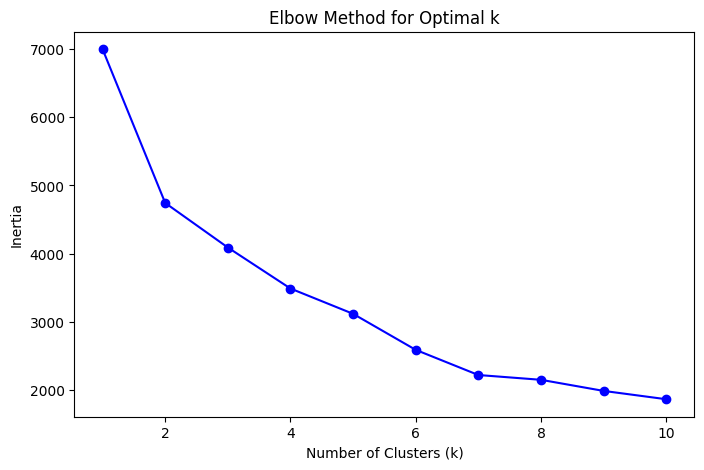

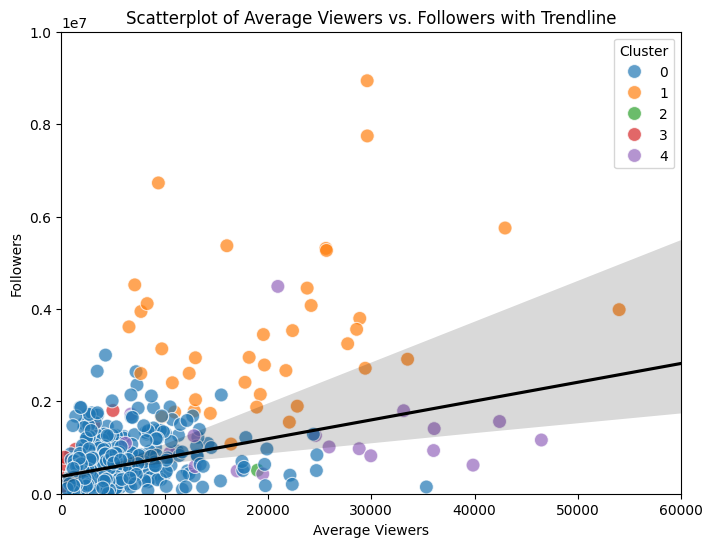

    Channel  Cluster  Watch time(Minutes)  Stream time(minutes)  Peak viewers  \
0     xQcOW        1           6196161750                215250        222720   
1  summit1g        1           6091677300                211845        310998   
2    Gaules        1           5644590915                515280        387315   
3  ESL_CSGO        1           3970318140                517740        300575   
4      Tfue        1           3671000070                123660        285644   

   Average viewers  Followers  Followers gained  Views gained  
0            27716    3246298           1734810      93036735  
1            25610    5310163           1370184      89705964  
2            10976    1767635           1023779     102611607  
3             7714    3944850            703986     106546942  
4            29602    8938903           2068424      78998587  


In [29]:
import pandas as pd
import numpy as np
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
import seaborn as sns

# Load data (ensure you have streamer_data available)
df = streamer_data.copy()

# Select relevant features for clustering
features = ['Watch time(Minutes)', 'Stream time(minutes)', 'Peak viewers',
            'Average viewers', 'Followers', 'Followers gained', 'Views gained']

X = df[features]

# Normalize data
scaler = StandardScaler()
X_normalized = scaler.fit_transform(X)

# Determine optimal clusters using Elbow Method
inertia = []
K_range = range(1, 11)
for k in K_range:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(X_normalized)
    inertia.append(kmeans.inertia_)

# Plot Elbow Curve
plt.figure(figsize=(8, 5))
plt.plot(K_range, inertia, 'bo-')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Inertia')
plt.title('Elbow Method for Optimal k')
plt.show()

# Choose optimal k (e.g., from elbow method) and apply K-Means
optimal_k = int(input("Enter the optimal number of clusters from the plot: "))  # Example: 3
kmeans = KMeans(n_clusters=optimal_k, random_state=42)
clusters = kmeans.fit_predict(X_normalized)

# Add cluster labels to the DataFrame
df['Cluster'] = clusters

# Plot the scatter plot for Average viewers vs Followers with trendline
plt.figure(figsize=(8, 6))
sns.scatterplot(x='Average viewers', y='Followers', hue='Cluster', data=df, palette='tab10', s=100, alpha=0.7)
sns.regplot(x='Average viewers', y='Followers', data=df, scatter=False, line_kws={'color': 'black'})
plt.title('Scatterplot of Average Viewers vs. Followers with Trendline')
plt.xlabel('Average Viewers')
plt.ylabel('Followers')

# Adjust axis limits
plt.xlim(0, 60000)  # x-axis range
plt.ylim(0, 1e7)    # y-axis range

plt.legend(title='Cluster')
plt.show()

# Display first few rows with cluster labels
print(df[['Channel', 'Cluster'] + features].head())


/Users/pradyundevarakonda/Library/Python/3.11/lib/python/site-packages/IPython/core/pylabtools.py:170: UserWarning: Glyph 54413 (\N{HANGUL SYLLABLE PUNG}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/Users/pradyundevarakonda/Library/Python/3.11/lib/python/site-packages/IPython/core/pylabtools.py:170: UserWarning: Glyph 50900 (\N{HANGUL SYLLABLE WEOL}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/Users/pradyundevarakonda/Library/Python/3.11/lib/python/site-packages/IPython/core/pylabtools.py:170: UserWarning: Glyph 47049 (\N{HANGUL SYLLABLE RYANG}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/Users/pradyundevarakonda/Library/Python/3.11/lib/python/site-packages/IPython/core/pylabtools.py:170: UserWarning: Glyph 54620 (\N{HANGUL SYLLABLE HAN}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/Users/pradyundevarakonda/Library/Python/3.11/lib/python/site-packages/IPyth

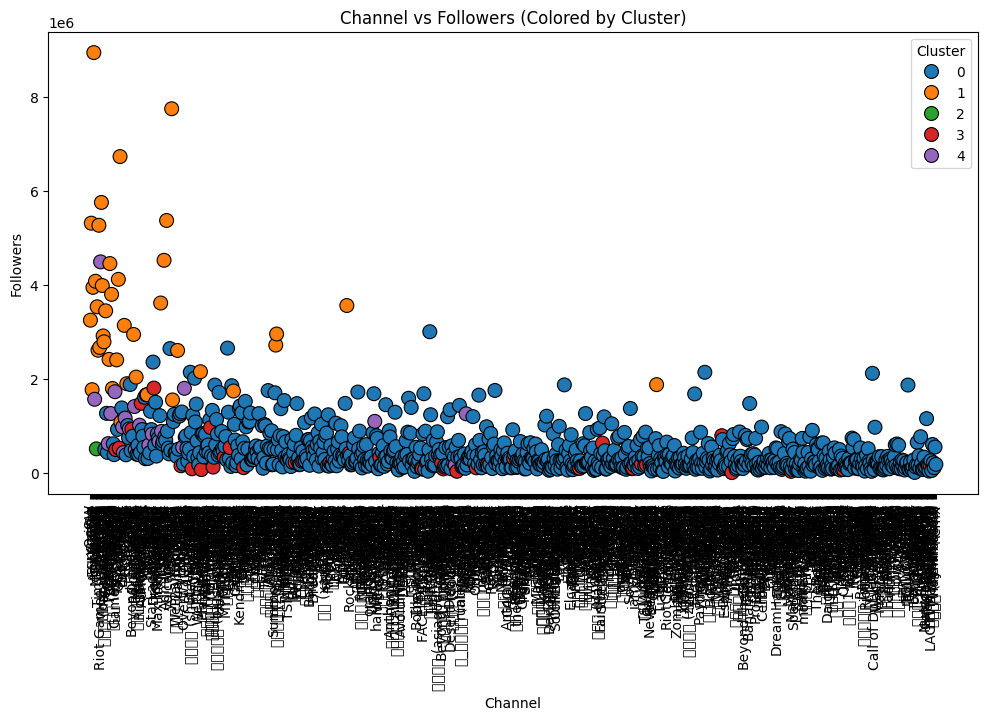

In [30]:
import matplotlib.pyplot as plt
import seaborn as sns

# Create the scatter plot with Channel vs Followers, colored by Cluster
plt.figure(figsize=(12, 6))
sns.scatterplot(data=df, x='Channel', y='Followers', hue='Cluster', palette='tab10', s=100, edgecolor='black')

# Rotate x-axis labels for better readability
plt.xticks(rotation=90)

# Set plot labels and title
plt.xlabel('Channel')
plt.ylabel('Followers')
plt.title('Channel vs Followers (Colored by Cluster)')

# Show the plot
plt.show()


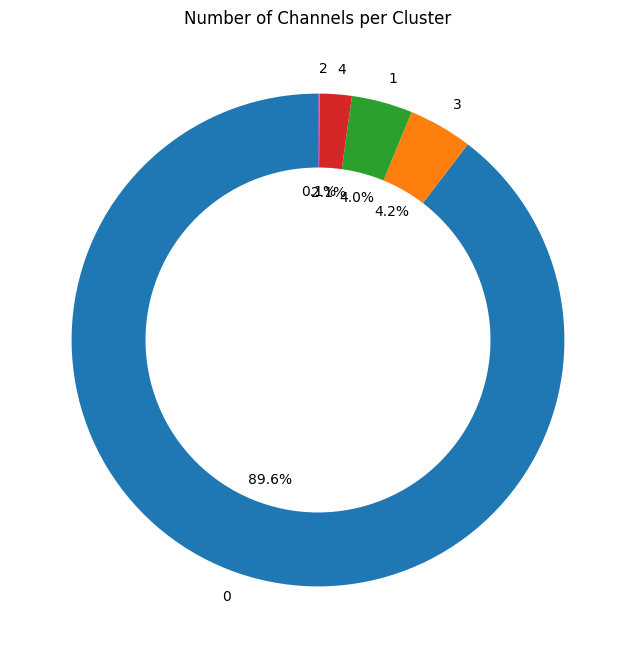

In [31]:
import matplotlib.pyplot as plt

# Count the number of channels per cluster
cluster_counts = df['Cluster'].value_counts()

# Plot a donut chart
plt.figure(figsize=(8, 8))

# Create the wedge chart (pie chart)
plt.pie(cluster_counts, labels=cluster_counts.index, autopct='%1.1f%%', startangle=90, colors=sns.color_palette('tab10', len(cluster_counts)))

# Add a circle in the center to create the "donut" effect
centre_circle = plt.Circle((0, 0), 0.70, color='white', lw=0)
plt.gca().add_artist(centre_circle)

# Set plot title
plt.title('Number of Channels per Cluster')

# Show the plot
plt.show()


To generate better clusters, especially when the distribution is highly skewed, there are a few strategies you can try to improve your clustering results:

1. Feature Scaling (Normalization/Standardization)
If you haven't already done so, ensure that all your features are properly scaled (standardized or normalized). This prevents features with larger ranges (like Followers) from dominating the clustering process.
You can try using StandardScaler, MinMaxScaler, or RobustScaler to scale the features.
python
Copy code


In [20]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)


. Dimensionality Reduction
If your features are high-dimensional, consider reducing the dimensionality using PCA (Principal Component Analysis) or t-SNE (t-Distributed Stochastic Neighbor Embedding). These methods can help separate the clusters more clearly by reducing noise in the data.

In [21]:
from sklearn.decomposition import PCA

pca = PCA(n_components=2)  # Reduce to 2 components
X_pca = pca.fit_transform(X_scaled)


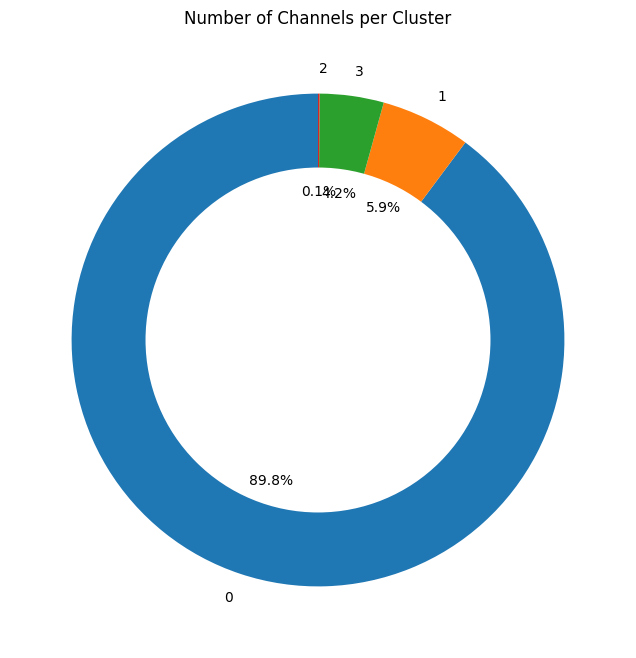

In [22]:
import matplotlib.pyplot as plt

# Count the number of channels per cluster
cluster_counts = df['Cluster'].value_counts()

# Plot a donut chart
plt.figure(figsize=(8, 8))

# Create the wedge chart (pie chart)
plt.pie(cluster_counts, labels=cluster_counts.index, autopct='%1.1f%%', startangle=90, colors=sns.color_palette('tab10', len(cluster_counts)))

# Add a circle in the center to create the "donut" effect
centre_circle = plt.Circle((0, 0), 0.70, color='white', lw=0)
plt.gca().add_artist(centre_circle)

# Set plot title
plt.title('Number of Channels per Cluster')

# Show the plot
plt.show()


3. Try Different Clustering Algorithms
K-Means can sometimes produce skewed clusters when the clusters are not spherical. If K-Means isn't giving satisfactory results, try using other clustering algorithms that might better handle non-spherical data.

DBSCAN (Density-Based Spatial Clustering of Applications with Noise): DBSCAN can help detect outliers (noise) and create non-spherical clusters. It’s useful when clusters have irregular shapes.

In [23]:
from sklearn.cluster import DBSCAN

dbscan = DBSCAN(eps=0.5, min_samples=5)
clusters_dbscan = dbscan.fit_predict(X_scaled)
df['Cluster_DBSCAN'] = clusters_dbscan


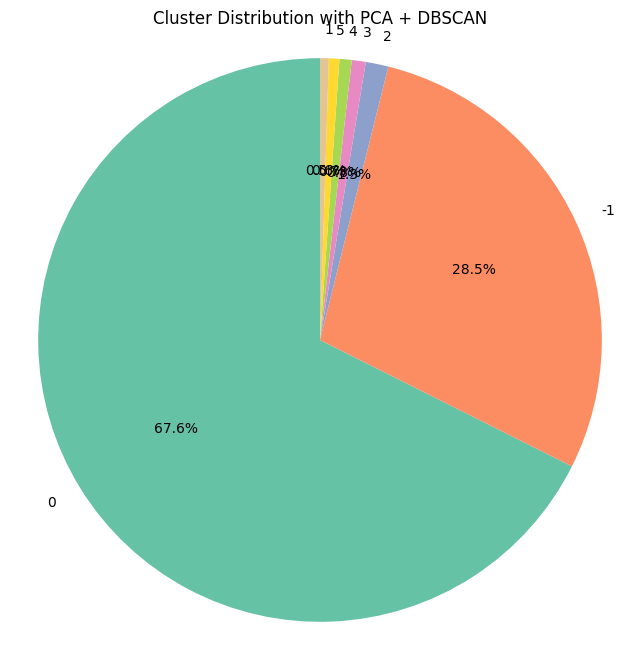

Cluster Distribution (PCA + DBSCAN):
Cluster_PCA
 0    676
-1    285
 2     13
 3      8
 4      7
 5      6
 1      5
Name: count, dtype: int64


In [24]:
import pandas as pd
import numpy as np
from sklearn.decomposition import PCA
from sklearn.cluster import DBSCAN
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
import seaborn as sns

# Load data (ensure you have streamer_data available)
df = streamer_data.copy()

# Select relevant features for clustering
features = ['Watch time(Minutes)', 'Stream time(minutes)', 'Peak viewers',
            'Average viewers', 'Followers', 'Followers gained', 'Views gained']

X = df[features]

# Normalize data
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# PCA for dimensionality reduction to 2 components
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)

# Apply DBSCAN
dbscan = DBSCAN(eps=0.5, min_samples=5)
clusters_dbscan = dbscan.fit_predict(X_scaled)

# Add PCA and DBSCAN results to DataFrame
df['Cluster_PCA'] = clusters_dbscan
df['PCA_1'] = X_pca[:, 0]
df['PCA_2'] = X_pca[:, 1]

# Plot donut chart for PCA clusters
cluster_counts_pca = df['Cluster_PCA'].value_counts()
fig, ax = plt.subplots(figsize=(8, 8))
ax.pie(cluster_counts_pca, labels=cluster_counts_pca.index, autopct='%1.1f%%', startangle=90, colors=sns.color_palette("Set2", len(cluster_counts_pca)))
ax.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
plt.title("Cluster Distribution with PCA + DBSCAN")
plt.show()

# Optionally, print the statistics of the clusters
print("Cluster Distribution (PCA + DBSCAN):")
print(cluster_counts_pca)



Agglomerative Hierarchical Clustering: This is another method that can work well for skewed distributions, especially if the clusters are hierarchical.
Agglomerative Clustering Example:

In [ ]:
from sklearn.cluster import AgglomerativeClustering

agglomerative = AgglomerativeClustering(n_clusters=4)
clusters_agglomerative = agglomerative.fit_predict(X_scaled)
df['Cluster_Agg'] = clusters_agglomerative


/Users/pradyundevarakonda/Library/Python/3.11/lib/python/site-packages/IPython/core/pylabtools.py:170: UserWarning: Glyph 34662 (\N{CJK UNIFIED IDEOGRAPH-8766}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/Users/pradyundevarakonda/Library/Python/3.11/lib/python/site-packages/IPython/core/pylabtools.py:170: UserWarning: Glyph 24859 (\N{CJK UNIFIED IDEOGRAPH-611B}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/Users/pradyundevarakonda/Library/Python/3.11/lib/python/site-packages/IPython/core/pylabtools.py:170: UserWarning: Glyph 27224 (\N{CJK UNIFIED IDEOGRAPH-6A58}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/Users/pradyundevarakonda/Library/Python/3.11/lib/python/site-packages/IPython/core/pylabtools.py:170: UserWarning: Glyph 23376 (\N{CJK UNIFIED IDEOGRAPH-5B50}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/Users/pradyundevarakonda/Library/Python/3.11/lib/py

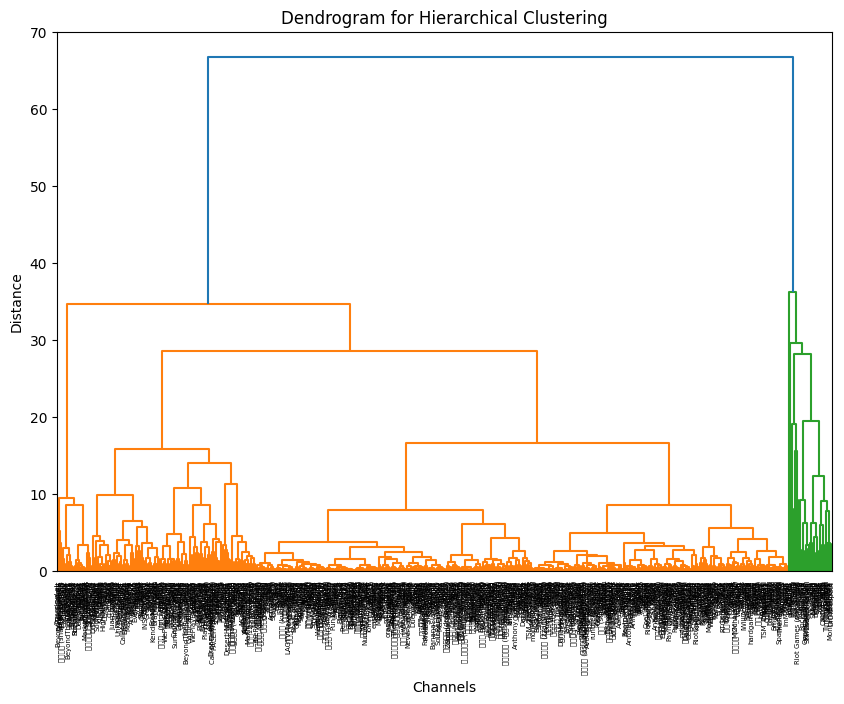

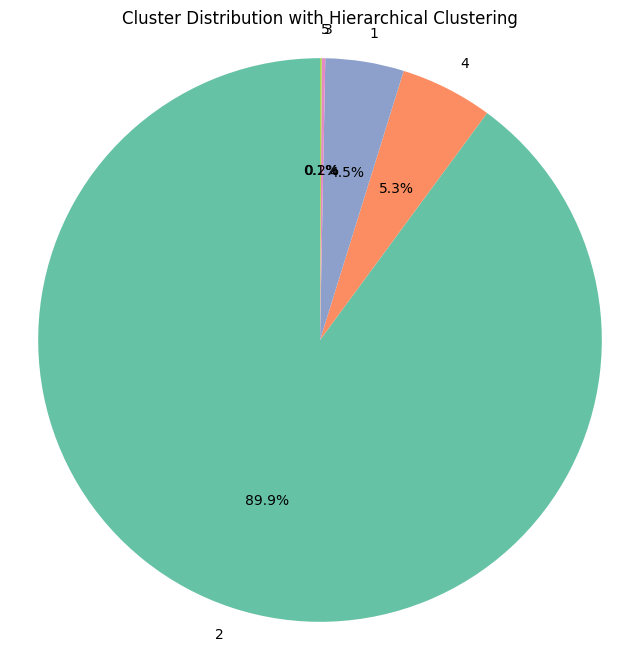

Cluster Distribution (Hierarchical Clustering):
Cluster_Hierarchical
2    899
4     53
1     45
3      2
5      1
Name: count, dtype: int64


In [26]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler
from scipy.cluster.hierarchy import dendrogram, linkage, fcluster
import matplotlib.pyplot as plt
import seaborn as sns

# Load data (ensure you have streamer_data available)
df = streamer_data.copy()

# Select relevant features for clustering
features = ['Watch time(Minutes)', 'Stream time(minutes)', 'Peak viewers',
            'Average viewers', 'Followers', 'Followers gained', 'Views gained']

X = df[features]

# Normalize data
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Perform Hierarchical Clustering
Z = linkage(X_scaled, method='ward')  # Using 'ward' for variance minimization

# Plot the Dendrogram to visualize the clustering
plt.figure(figsize=(10, 7))
dendrogram(Z, labels=df['Channel'].to_numpy(), leaf_rotation=90)
plt.title('Dendrogram for Hierarchical Clustering')
plt.xlabel('Channels')
plt.ylabel('Distance')
plt.show()

# Choose the number of clusters (example: 4 clusters)
num_clusters = int(input("Enter the number of clusters you want: "))

# Apply the clustering to assign cluster labels
df['Cluster_Hierarchical'] = fcluster(Z, num_clusters, criterion='maxclust')

# Plot donut chart for hierarchical clusters
cluster_counts_hierarchical = df['Cluster_Hierarchical'].value_counts()
fig, ax = plt.subplots(figsize=(8, 8))
ax.pie(cluster_counts_hierarchical, labels=cluster_counts_hierarchical.index, autopct='%1.1f%%', startangle=90, colors=sns.color_palette("Set2", len(cluster_counts_hierarchical)))
ax.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
plt.title("Cluster Distribution with Hierarchical Clustering")
plt.show()

# Optionally, print the statistics of the clusters
print("Cluster Distribution (Hierarchical Clustering):")
print(cluster_counts_hierarchical)

